### IMPORTANT: This notebook file will not run unless the .ipynb file and the DCComics.csv are in the same folder! 

# DC Comics data plot project skeleton

### DC_comics_skeleton created by Ricarose Roque. Pandas matplotlib skeleton created by Wendy Norris and plots created by Stephen Barton as a demo for Summer INFO 1201.

##### Step 1: Import the pandas and matplotlib libraries into Jupyter Notebook. <font color=red><-- Check out the new library</font>

This command provides routine instructions to Python on how to handle the data in the spreadsheet. We abbreviate Pandas as pd and Numpy as np for faster typing/cleaner looking code. To plot the data, we'll use a new library called matplotlib and a sublibrary called pyplot. 

With matplotlib, it needs two particular directions. 
    1. matplotlib inline to display the plots inside the Jupyter Notebook cell.  
    2. plt.rcParams["figure.figsize"] = (x, y) to set the size for all the plots.

Click <i>Shift-Enter</i> through the import line. It won't look to you like anything happened but Jupyter knows. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)

##### Step 2: Now we set up pandas to open the csv file. 

First, we'll tell Jupyter to use some of the built-in instructions from the imported Python libraries to read the file. 

We'll assign a new name to the csv file to make it easier to differentiate between the file on our desktops and the one we're working with in Jupyter.  

Next, use the pd.read_csv command to tell Jupyter to take all the data, read it, and copy it into this new variable called "superheroes". Finally, on the same line, we add the command to <i>parse_dates</i>. This is a nifty trick by Pandas to standardize the way the YEAR column in the csv file is formatted in Jupyter so that Python understands that 2017 is a year and not just a <i>string</i> or <i>integer</i>. This will make it easier for us to access and explore the data. 

Again, when you <i>Shift-Enter</i> through this next cell, it won't look like anything happened. 

In [2]:
superheroes = pd.read_csv("DCComics.csv", parse_dates = ["YEAR"])

##### Step 3: Let's print a few lines of the superheroes list to make sure Jupyter read it correctly.

Pandas makes it super easy to print a nice dataframe to look at the <i>head</i> or the first 5 rows of the spreadsheet to check for any import errors. 

In [3]:
superheroes.head()

,page_id,name,urlslug,ID,ALIGN,EYES,HAIR,SEX,SEXUALITY,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,85254,Springheeled Jack (Prime Earth),Springheeled_Jack_(Prime_Earth),Secret Identity,Bad Characters,ND,ND,Male Characters,Heterosexual Characters,Living Characters,1,"2013, October",2013
1,238459,Cricket (New Earth),Cricket_(New_Earth),Secret Identity,Bad Characters,ND,White Hair,Male Characters,Heterosexual Characters,Living Characters,1,"2011, September",2011
2,239474,Jabberwock (New Earth),Jabberwock_(New_Earth),Secret Identity,Bad Characters,ND,ND,Male Characters,Heterosexual Characters,Living Characters,1,"2011, September",2011
3,252767,Theodoric (New Earth),Theodoric_(New_Earth),Secret Identity,Good Characters,Black Eyes,Brown Hair,Male Characters,Heterosexual Characters,Living Characters,1,"2011, September",2011
4,255408,Nicholas Pierce (New Earth),Nicholas_Pierce_(New_Earth),Secret Identity,Bad Characters,ND,Red Hair,Male Characters,Heterosexual Characters,Living Characters,1,"2011, October",2011


#### Step 4: Now, we can get down to business and begin to explore the data with regular old Python code. Pandas, NumPy and Matplotlib are doing all the work behind the scenes. 

Unlike some of the code we've reviewed in class, this data analysis is much more streamlined by using the Python libraries to do the heavy lifting. We don't need to use the <i>"def main()"</i> and <i>"def"</i> functions to define the new variables.  

#### Step 5: Following are some examples of Python code calling different data insights from the spreadsheet on your desktop and plotting data visualizations. 

### Plot #1: Total number of characters by gender. 
#### This is a fairly simple, straightforward query that would be well represented by a bar chart, horizontal bar chart or pie chart. Nothing fancy. Just gets the job done.

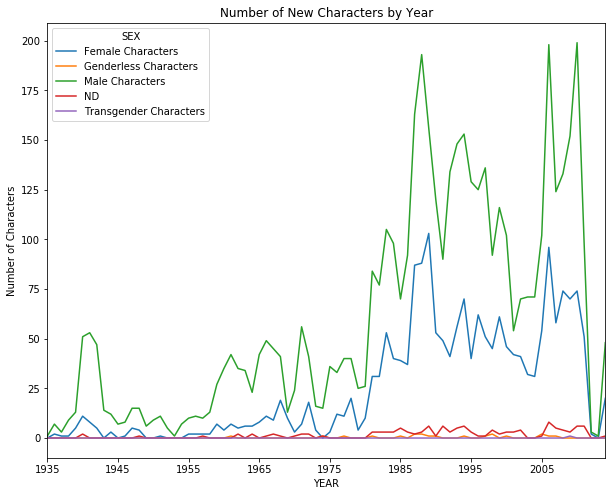

In [4]:
appearance_by_sex = pd.crosstab(superheroes['YEAR'], superheroes['SEX'])
appearance_by_sex.plot()
plt.title("Number of New Characters by Year")
plt.ylabel("Number of Characters")
plt.show()

### Plot #2: A crosstab of characters. 
#### This is kind of query is best suited as a bar chart — vertical or horizontal.

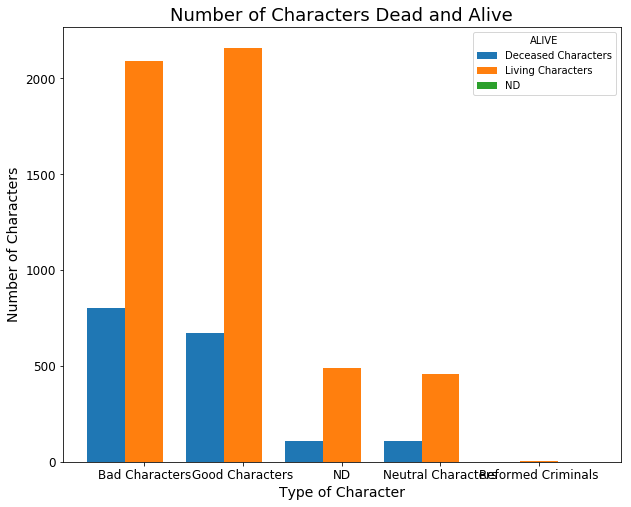

In [5]:
alive_or_dead = pd.crosstab(superheroes["ALIGN"], superheroes["ALIVE"])
alive_or_dead.plot(kind = 'bar', width = 1.15)
plt.title("Number of Characters Dead and Alive", fontsize = 18)
plt.xticks(rotation=0, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Type of Character", fontsize = 14)
plt.ylabel("Number of Characters", fontsize = 14)
plt.show()

### Plot #3: Another crosstab with more control over the plot layout
#### But check out the last bar representing Reformed Criminals' identities. What's going on there? Is it a data error?

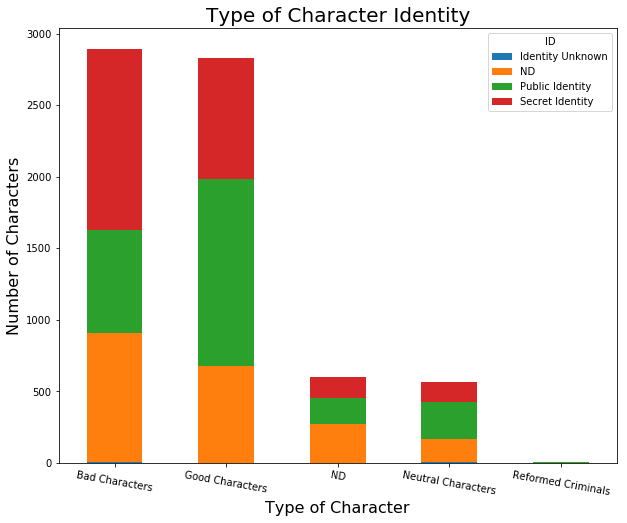

In [6]:
identity_count = pd.crosstab(superheroes['ALIGN'], superheroes['ID'])
identity_count.plot(kind = 'bar', stacked = True)
plt.title("Type of Character Identity", fontsize = 20)
plt.xticks(rotation=-10, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Type of Character", fontsize = 16)
plt.ylabel("Number of Characters", fontsize = 16)
plt.show()

### It's not a data error but just a value with a very low number in comparison to the others. Consider removing it from the data query and using your narrative to mention that there are only a few characters with unknown identities. 

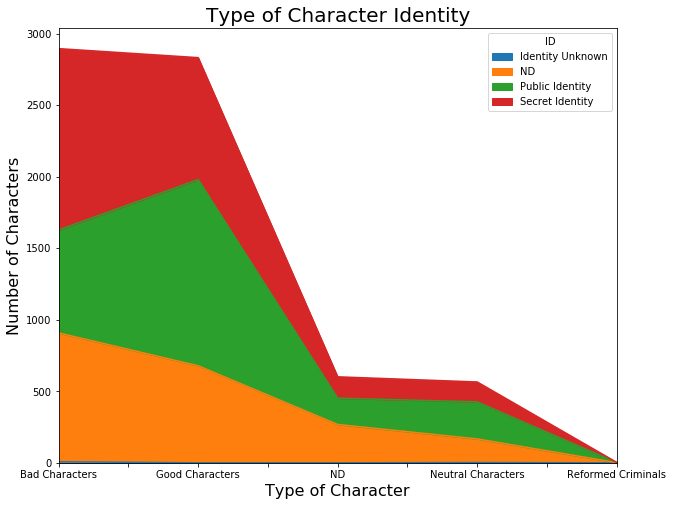

In [7]:
identity_count = pd.crosstab(superheroes['ALIGN'], superheroes['ID'])
identity_count.plot.area();
plt.title("Type of Character Identity", fontsize = 20)
plt.xticks(rotation=0, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Type of Character", fontsize = 16)
plt.ylabel("Number of Characters", fontsize = 16)

### Plot #4: Another view of the chart above as a regular bar chart. 
#### But we still seem to have a problem with the last character type. And the plot layout could use a little help. What would you do? 

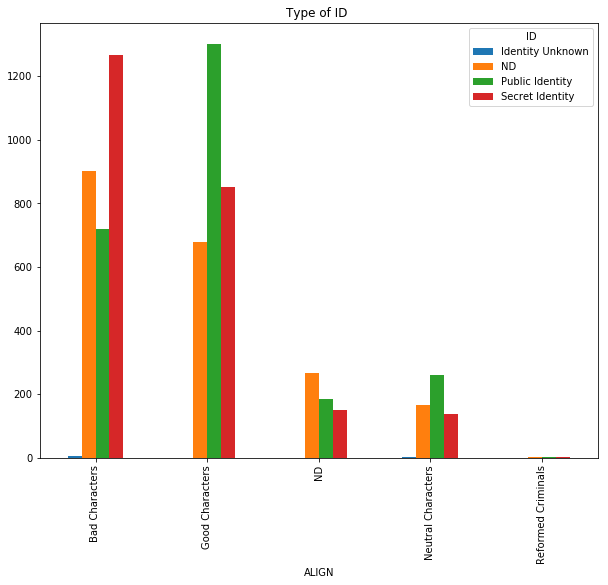

In [8]:
identity_count = pd.crosstab(superheroes['ALIGN'], superheroes['ID'])
identity_count.plot(kind= 'bar')
plt.title('Type of ID ')
plt.show()

### Plot #5: A plot that's fighting itself to the death
#### Chalk this up to a great idea that's not actually plottable. How do you plot names? Hint: Not very well. 

In [9]:
superheroes1 = superheroes.drop(superheroes[superheroes.APPEARANCES == "ND"].index)
superheroes1['APPEARANCES'] = superheroes['APPEARANCES']
pop_heroes = superheroes1.sort_values(by = "APPEARANCES", ascending = False)

print(pop_heroes)

      page_id                                          name  \
4690     1869                     Natasha Irons (New Earth)   
4686     4170                   Lorraine Reilly (New Earth)   
6753     2780                           Stealth (New Earth)   
4685     1797                 Katherine Spencer (New Earth)   
4688     1903                           Despero (New Earth)   
4689    69043                        Jan Haasan (New Earth)   
4687     1623                      Noah Kuttler (New Earth)   
4684    16693                 Tef\u00e9 Holland (New Earth)   
6751     2085                  Hippolyta Trevor (New Earth)   
6752     1851             Jeffrey Franklin Burr (New Earth)   
6822     1459                        Alan Scott (New Earth)   
4683    27613                   Charles Dickles (New Earth)   
4681    16836                           Bizarro (New Earth)   
4682     1850                     Henry Henshaw (New Earth)   
4903     1905                    Barbara Gordon (New Ea

In [10]:
superheroes1 = superheroes[["APPEARANCES","name"]].set_index("name")
appearances = superheroes1.sort_values(by = "APPEARANCES", ascending = False)

print(appearances)
ax = appearances.iloc[:10].plot(kind="barh")
ax = appearances.plot(kind="barh")
ax.invert_yaxis()
plt.title("Characters Who Have Appeared the Most")
plt.show()

                                             APPEARANCES
name                                                    
Mrblonde267\/Buddy Blank (New Earth)                  ND
Heatseeker (New Earth)                                ND
S'ivaa (New Earth)                                    ND
Hardwire (New Earth)                                  ND
Faith O'Dare (New Earth)                              ND
N'Takki (New Earth)                                   ND
Nameless One (New Earth)                              ND
Catapult (New Earth)                                  ND
Pellmell (New Earth)                                  ND
Signal Ray (New Earth)                                ND
Snow Owl (New Earth)                                  ND
Dungeon (New Earth)                                   ND
Johnny Lynx (New Earth)                               ND
Ebrax (New Earth)                                     ND
Lethal (New Earth)                                    ND
Digit (New Earth)              

TypeError: Empty 'DataFrame': no numeric data to plot

### Plot #6: This crosstab offers some interesting comparisons but we need a different type of graph. 
#### The range of results is so huge that the bars for genderless characters (n = 20) get lost when the comparison genders have hundreds, if not thousands, of characters. 

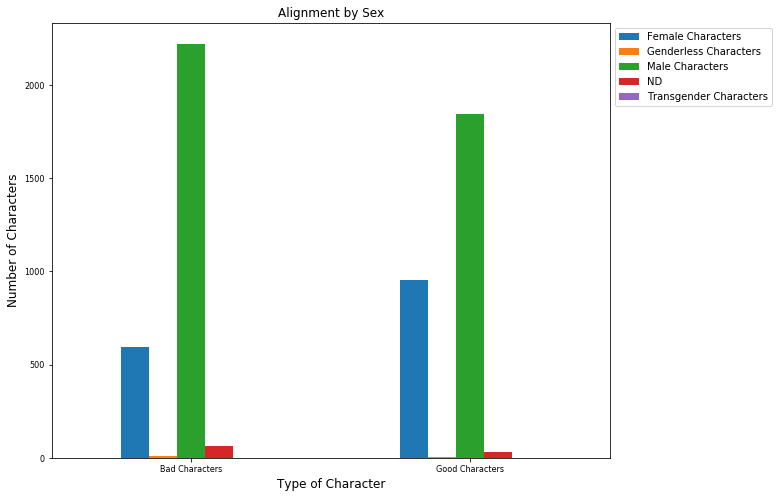

In [11]:
align_by_sex = pd.crosstab(superheroes['ALIGN'], superheroes['SEX'])
align_by_sex.iloc[:2].plot.bar(legend = True)
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', ncol=1)
plt.title('Alignment by Sex')
plt.xticks(rotation=0, fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel("Type of Character", fontsize = 12)
plt.ylabel("Number of Characters", fontsize = 12)
plt.show()

### Maybe a series of pie charts?

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(-1.1120204027203673,
 1.1005724366122305,
 -1.1000000000000001,
 1.1000000000000001)

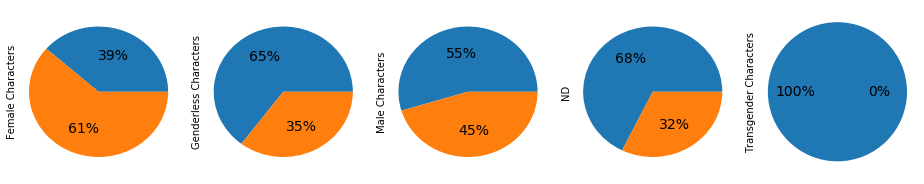

In [18]:
align_by_sex = pd.crosstab(superheroes['ALIGN'], superheroes['SEX'])
align_by_sex.iloc[:2].plot.pie(subplots=True, autopct='%1.0f%%', figsize=(16,3), legend=True, labels=None, fontsize=14)
plt.axis("equal")

### Plot #7: Superheroes by era
#### Let's try a fancier look at date ranges -- this one isn't working quite yet. : ( 

(-1.1027603951053095,
 1.1001314473859671,
 -1.1038689378491935,
 1.1016752243118602)

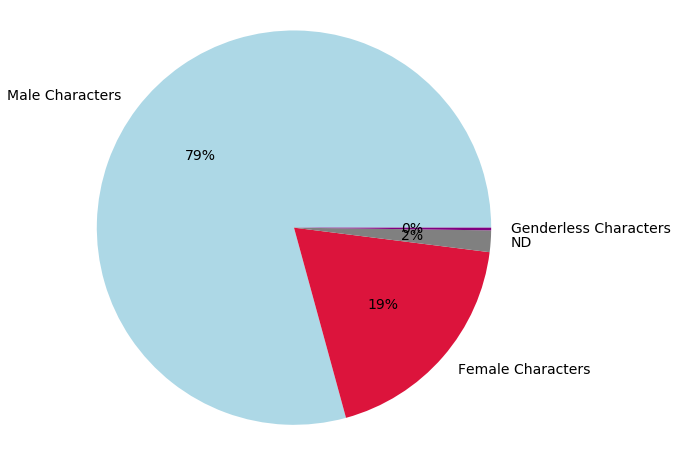

In [13]:
superheroes_era = (superheroes["YEAR"] > "1959") & (superheroes["YEAR"] < "1970")
superheroes_60s = (superheroes[superheroes_era])
sixties_sexcount = superheroes_60s["SEX"].value_counts()

# add some custom colors
colors = ["lightblue", "crimson", "gray", "purple"]

# add percents to each wedge, get rid of labels surrounding graph (will be expressed on legend), set colors, add title
sixties_sexcount.plot(kind = "pie", autopct = "%1.0f%%", colors = colors, subplots=True, fontsize=14)
plt.title=("Sex Breakdown of '60s Superheroes")

#get rid of y axis label SEX - http://stackoverflow.com/questions/34094596/python-matplotlib-pyplot-pie-charts-how-to-remove-the-label-on-the-left-side
plt.axes().set_ylabel('')

#make plot have even axes so the pie chart is perfectly circular
plt.axis("equal")